# Formatting I: subplots, markers, colors, axes

<br>
<br>

# Sections

- [Subplots](#Subplots)

    - [m x n subplots](#m-x-n-subplots)
    
    - [Labeling a subplot grid like a matrix](#Labeling-a-subplot-grid-like-a-matrix)

    - [Shared X- and Y-axes](#Shared-X--and-Y-axes)
    
    - [Setting title and labels](#Setting-title-and-labels)
    
    - [Hiding redundant subplots](#Hiding-redundant-subplots)
    
- [Defining Colors](#Defining-colors)

    - [3 ways to define colors](#3-ways-to-define-colors)
    
    - [matplotlib color names](#matplotlib-color-names)

    - [Colormaps](#Colormaps)
    
    - [Gray-levels](#Gray-levels)
    
    - [Edgecolors for scatter plots](#Edgecolors-for-scatter-plots)
    
    - [Color gradients](#Color-gradients)

- [Marker styles](#Marker-styles)

- [Line styles](#Line-styles)

- [Fancy and transparent legends](#Fancy-and-transparent-legends)

- [Hiding axes](#Hiding-axes)

    - [Hiding axis ticks and labels](#Hiding-axis-ticks-and-labels)
    
    - [Removing frame and ticks](#Removing-frame-and-ticks)
    
- [Aesthetic axis layout](#Aesthetic-axis-layout)
    
- [Custom tick labels](#Custom-tick-labels)

    - [Text and rotation](#Text-and-rotation)
    
    - [Adding a constant value to axis labels](#Adding-a-constant-value-to-axis-labels)

<br>
<br>

# Subplots

[[back to top](#Sections)]

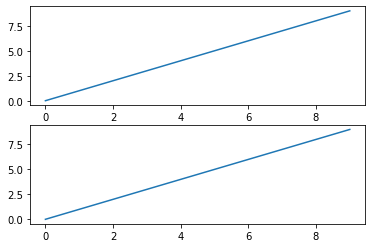

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(2)

for sp in ax:
    sp.plot(x, y)

<br>
<br>

### m x n subplots

[[back to top](#Sections)]

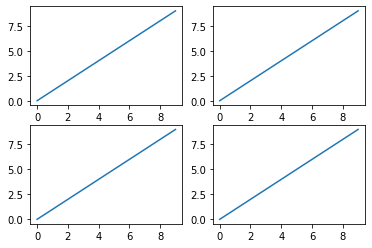

In [2]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=2,ncols=2)

for row in ax:
    for col in row:
        col.plot(x, y)
        
plt.show()

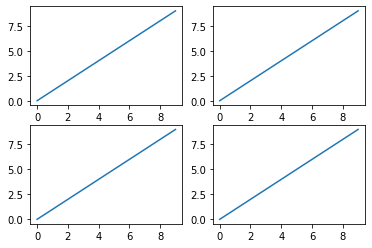

In [3]:
fig, ax = plt.subplots(nrows=2,ncols=2)

plt.subplot(2,2,1)
plt.plot(x, y)

plt.subplot(2,2,2)
plt.plot(x, y)
    
plt.subplot(2,2,3)
plt.plot(x, y)

plt.subplot(2,2,4)
plt.plot(x, y)
    
plt.show()

<br>
<br>

### Labeling a subplot grid like a matrix

[[back to top](#Sections)]

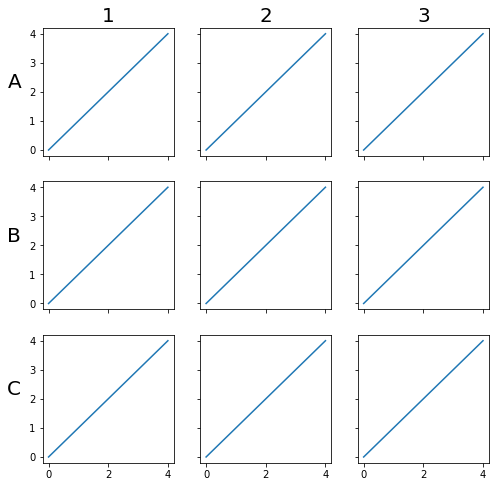

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3, 
                         sharex=True, sharey=True,
                         figsize=(8,8)
                         )
x = range(5)
y = range(5)

for row in axes:
    for col in row:
        col.plot(x, y)

for ax, col in zip(axes[0,:], ['1', '2', '3']):
    ax.set_title(col, size=20)
    
for ax, row in zip(axes[:,0], ['A', 'B', 'C']):
    ax.set_ylabel(row, size=20, rotation=0, labelpad=15)
  
plt.show()

<br>
<br>

### Shared X- and Y-axes

[[back to top](#Sections)]

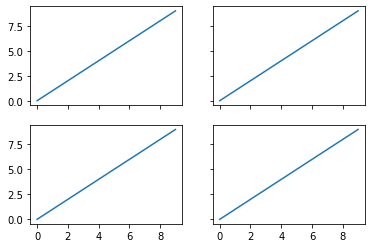

In [5]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True)

for row in ax:
    for col in row:
        col.plot(x, y)
    
plt.show()

<br>
<br>

### Setting title and labels

[[back to top](#Sections)]

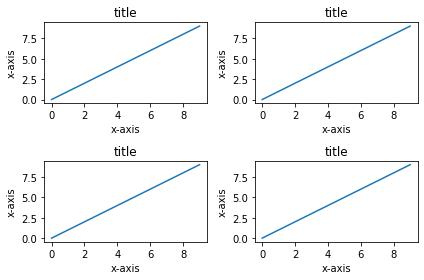

In [6]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=2,ncols=2)

for row in ax:
    for col in row:
        col.plot(x, y)
        col.set_title('title')  
        col.set_xlabel('x-axis')
        col.set_ylabel('x-axis')
                
fig.tight_layout()
            
plt.show()

<br>
<br>

### Hiding redundant subplots

[[back to top](#Sections)]

Sometimes we create more subplots for a rectangular layout (here: 3x3) than we actually need. Here is how we hide those redundant subplots. Let's assume that we only want to show the first 7 subplots:

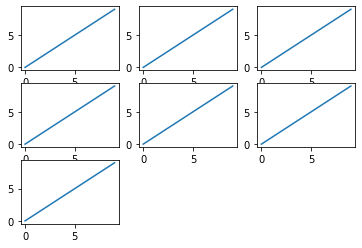

In [7]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, axes = plt.subplots(nrows=3,ncols=3)

for cnt, ax in enumerate(axes.ravel()):
    if cnt < 7:    
        ax.plot(x, y)
    else:
        ax.axis('off') # hide subplot
plt.show()

<br>
<br>

# Defining colors

[[back to top](#Sections)]

<br>
<br>

### 3 ways to define colors

[[back to top](#Sections)]

Matplotlib supports 3 different ways to encode colors, e.g, if we want to use the color blue, we can define colors as

- RGB color values (range 0.0 to 1.0) -> `(0.0, 0.0, 1.0)`
- matplotlib supported names -> `'blue'` or `'b'`
- HTML hex values -> `'#0000FF'`

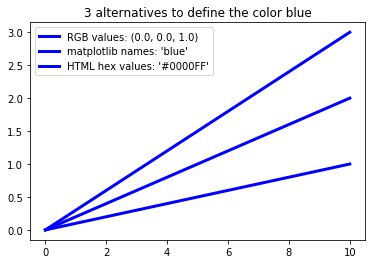

In [8]:
import matplotlib.pyplot as plt

samples = range(1,4)

for i, col in zip(samples, [(0.0, 0.0, 1.0), 'blue', '#0000FF']):
    plt.plot([0, 10], [0, i], lw=3, color=col) 

plt.legend(['RGB values: (0.0, 0.0, 1.0)', 
            "matplotlib names: 'blue'", 
            "HTML hex values: '#0000FF'"],
           loc='upper left')    
plt.title('3 alternatives to define the color blue')
    
plt.show()

<br>
<br>

### matplotlib color names

[[back to top](#Sections)]

The color names that are supported by matplotlib are

b: blue  
g: green  
r: red  
c: cyan  
m: magenta  
y: yellow  
k: black  
w: white  
    
where the first letter represents the shortcut version.

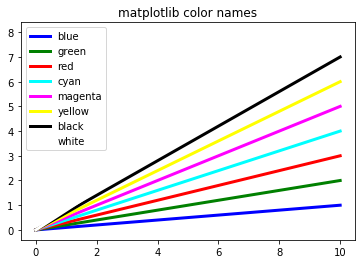

In [9]:
import matplotlib.pyplot as plt

cols = ['blue', 'green', 'red', 'cyan',  'magenta', 'yellow', 'black', 'white']

samples = range(1, len(cols)+1)

for i, col in zip(samples, cols):
    plt.plot([0, 10], [0, i], label=col, lw=3, color=col) 

plt.legend(loc='upper left')    
plt.title('matplotlib color names')
    
plt.show()

<br>
<br>

### Edgecolors for scatter plots

[[back to top](#Sections)]

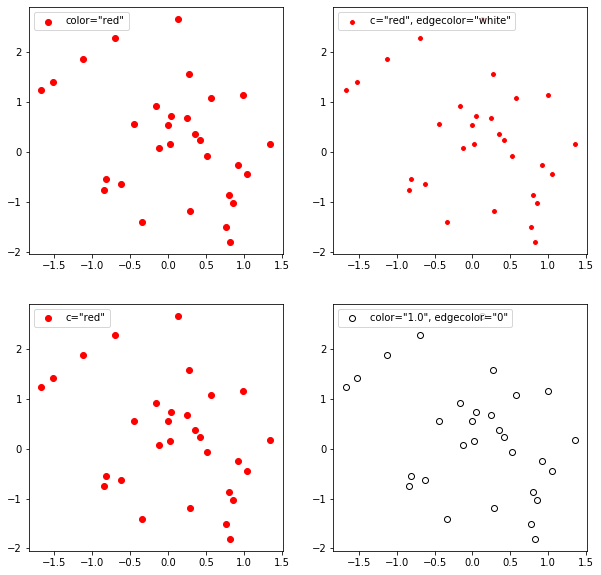

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

samples = np.random.randn(30,2)

ax[0][0].scatter(samples[:,0], samples[:,1], 
            color='red',
            label='color="red"')
    
ax[1][0].scatter(samples[:,0], samples[:,1],
            c='red',
            label='c="red"')

ax[0][1].scatter(samples[:,0], samples[:,1], 
            edgecolor='white', 
            c='red',
            label='c="red", edgecolor="white"')

ax[1][1].scatter(samples[:,0], samples[:,1], 
            edgecolor='0', 
            c='1',
            label='color="1.0", edgecolor="0"')

for row in ax:
    for col in row:
        col.legend(loc='upper left') 
    
plt.show()

<br>
<br>

# Marker styles

[[back to top](#Sections)]

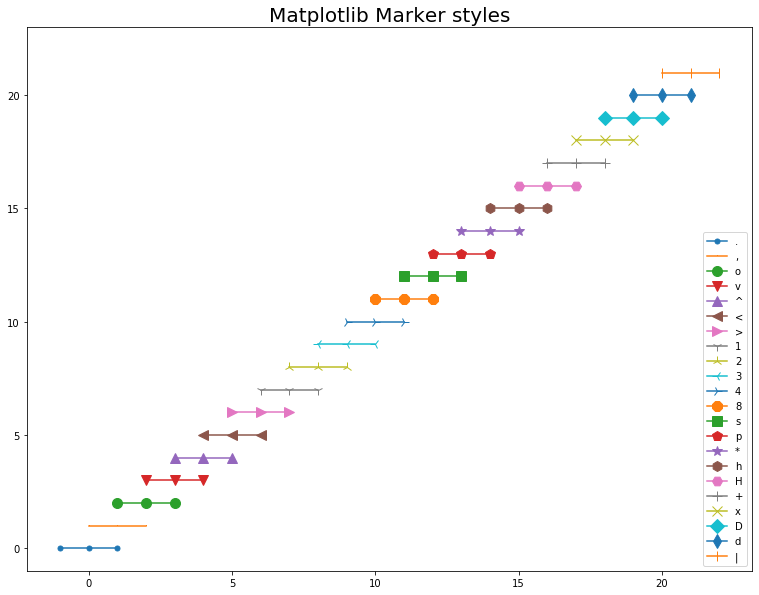

In [11]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

markers = [

'.', # point
',', # pixel
'o', # circle
'v', # triangle down
'^', # triangle up
'<', # triangle_left
'>', # triangle_right
'1', # tri_down
'2', # tri_up
'3', # tri_left
'4', # tri_right
'8', # octagon
's', # square
'p', # pentagon
'*', # star
'h', # hexagon1
'H', # hexagon2
'+', # plus
'x', # x
'D', # diamond
'd', # thin_diamond
'|', # vline

]

plt.figure(figsize=(13, 10))
samples = range(len(markers))


for i in samples:
    plt.plot([i-1, i, i+1], [i, i, i], label=markers[i], marker=markers[i], markersize=10) 


# Annotation    
    
plt.title('Matplotlib Marker styles', fontsize=20)
plt.ylim([-1, len(markers)+1])
plt.legend(loc='lower right')


plt.show()


<br>
<br>

# Line styles

[[back to top](#Sections)]

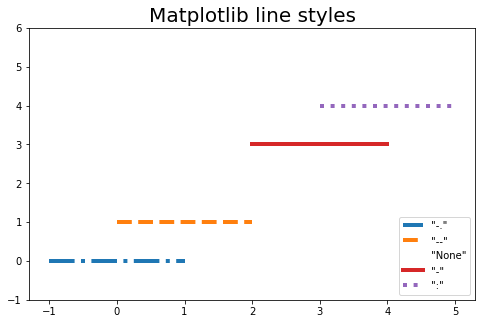

In [12]:
import numpy as np
import matplotlib.pyplot as plt

linestyles = ['-.', '--', 'None', '-', ':']

plt.figure(figsize=(8, 5))
samples = range(len(linestyles))


for i in samples:
    plt.plot([i-1, i, i+1], [i, i, i], 
             label='"%s"' %linestyles[i], 
             linestyle=linestyles[i],
             lw=4
             ) 

# Annotation    
    
plt.title('Matplotlib line styles', fontsize=20)
plt.ylim([-1, len(linestyles)+1])
plt.legend(loc='lower right')


plt.show()


<br>
<br>

# Fancy and transparent legends

[[back to top](#Sections)]

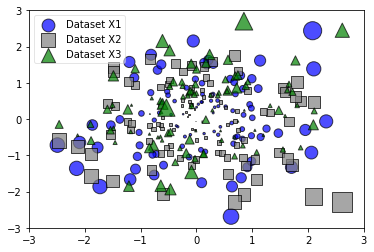

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2)
X3 = np.random.randn(100,2)

R1 = (X1**2).sum(axis=1)
R2 = (X2**2).sum(axis=1)
R3 = (X3**2).sum(axis=1)

plt.scatter(X1[:,0], X1[:,1],
            c='blue',
            marker='o',
            s=32. * R1,
            edgecolor='black',
            label='Dataset X1',
            alpha=0.7)
plt.scatter(X2[:,0], X2[:,1],
            c='gray',
            marker='s',
            s=32. * R2,
            edgecolor='black',
            label='Dataset X2',
            alpha=0.7)

plt.scatter(X2[:,0], X3[:,1],
            c='green',
            marker='^',
            s=32. * R3,
            edgecolor='black',
            label='Dataset X3',
            alpha=0.7)

plt.xlim([-3,3])
plt.ylim([-3,3])

leg = plt.legend(loc='upper left', fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

<br>
<br>

# Hiding axes

[[back to top](#Sections)]

<br>
<br>

### Hiding axis ticks and labels

[[back to top](#Sections)]

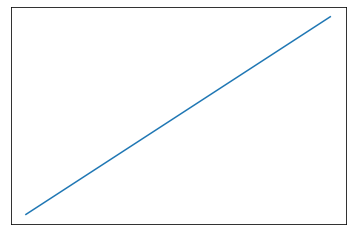

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig = plt.gca()

plt.plot(x, y)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

<br>
<br>

# Custom tick labels

[[back to top](#Sections)]

<br>
<br>

### Text and rotation

[[back to top](#Sections)]

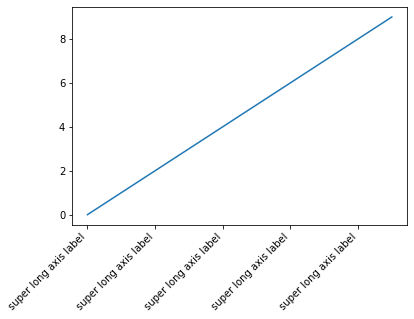

In [15]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)
labels = ['super long axis label' for i in range(10)]

fig, ax = plt.subplots()

plt.plot(x, y)

# set custom tick labels
ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

plt.show()

<br>
<br>

### Adding a constant value to axis labels

[[back to top](#Sections)]

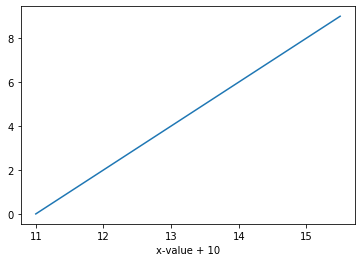

In [16]:
import matplotlib.pyplot as plt

CONST = 10

x = range(10)
y = range(10)
labels = [i+CONST for i in x]

fig, ax = plt.subplots()

plt.plot(x, y)
plt.xlabel('x-value + 10')

# set custom tick labels
ax.set_xticklabels(labels)

plt.show()

<br>
<br>